In [57]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt

df = pd.read_csv('training.csv', ",")
df['Date'] = pd.to_datetime(df['Date'])


In [58]:
df.head(10)

,Date,Value
0,1959-01-01,22.8331
1,1959-02-01,23.2802
2,1959-03-01,23.6156
3,1959-04-01,24.1186
4,1959-05-01,24.4820
5,1959-06-01,24.5099
6,1959-07-01,23.9230
7,1959-08-01,23.1125
8,1959-09-01,23.0846
9,1959-10-01,22.9169


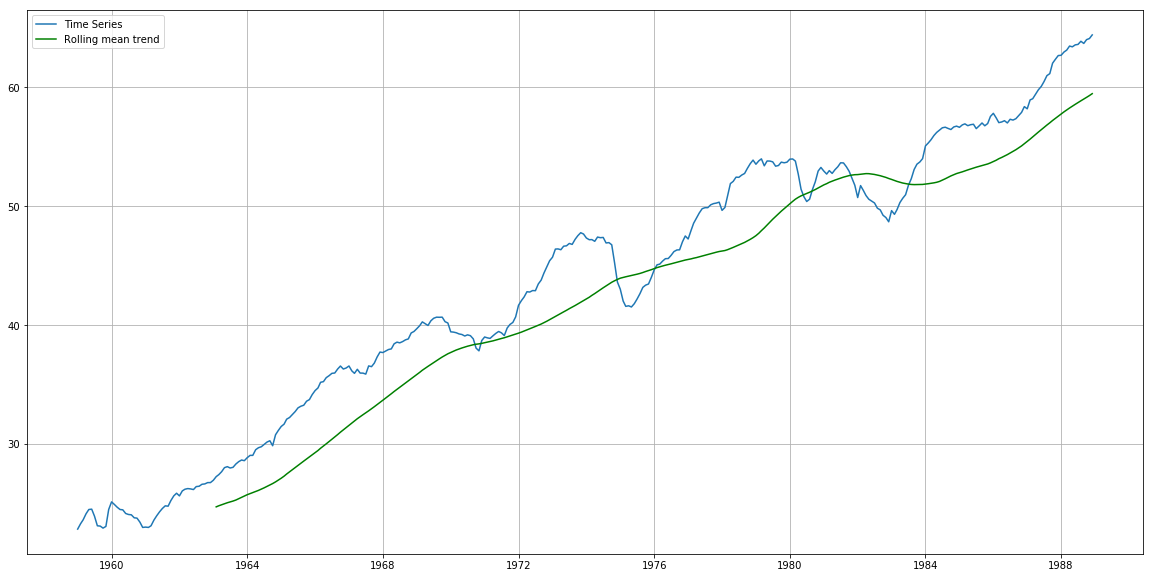

In [78]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df['Value'], label = "Time Series")
##
rolling_mean = df['Value'].rolling(window=50).mean()
plt.plot(df['Date'],rolling_mean, "g", label="Rolling mean trend")
plt.legend(loc="upper left")


plt.grid(True)
plt.show()


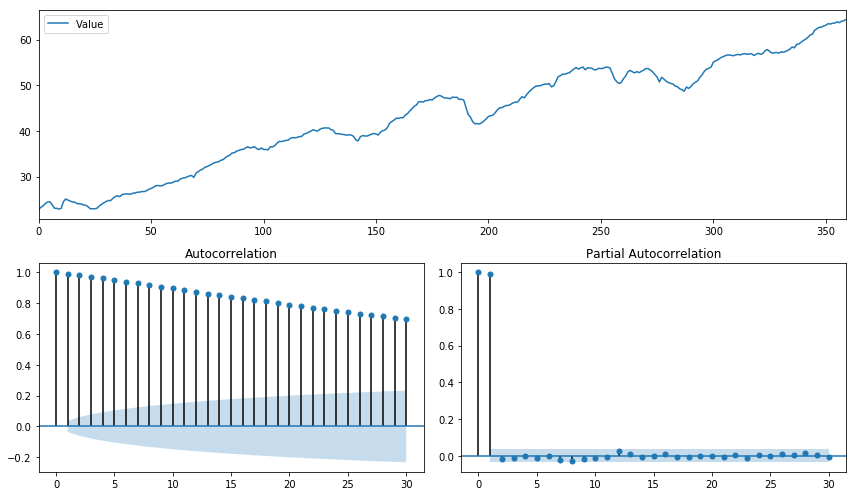

In [70]:
plt.figure(figsize = (12, 7))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

df.plot(ax = ts_ax)
smt.graphics.plot_acf(df['Value'], lags = 30, ax = acf_ax, alpha = 0.5)
smt.graphics.plot_pacf(df['Value'], lags = 30, ax = pacf_ax, alpha = 0.5)

plt.tight_layout()

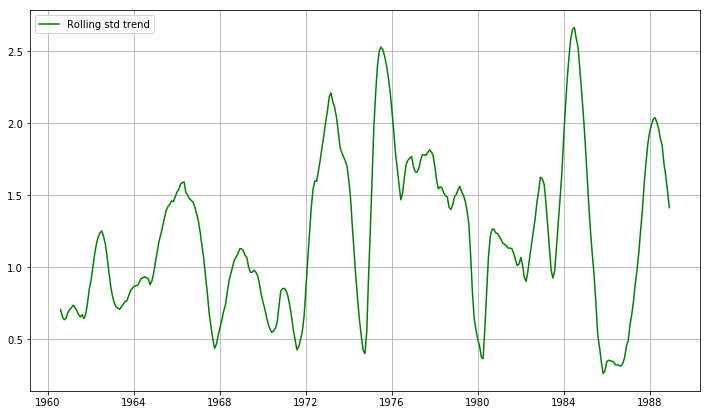

In [76]:
plt.figure(figsize = (12, 7))
rolling_std = df['Value'].rolling(window=20).std()
plt.plot(df['Date'], rolling_std, "g", label="Rolling std trend")
plt.legend(loc="upper left")
plt.grid(True)

In [21]:
df['Value'] = df['Value'].dropna()
test = sm.tsa.adfuller(df['Value'])
print ( 'adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -0.253391179928
p-value:  0.931851042299
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
есть единичные корни, ряд не стационарен


In [30]:
df1 = df['Value'].diff(periods=1).dropna()
df['Value'] = df['Value'].dropna()
df1.head()

1    0.4471
2    0.3354
3    0.5030
4    0.3634
5    0.0279
Name: Value, dtype: float64

In [24]:
test = sm.tsa.adfuller(df1)
print ( 'adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -7.36731149521
p-value:  9.1641495611e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459002}
единичных корней нет, ряд стационарен


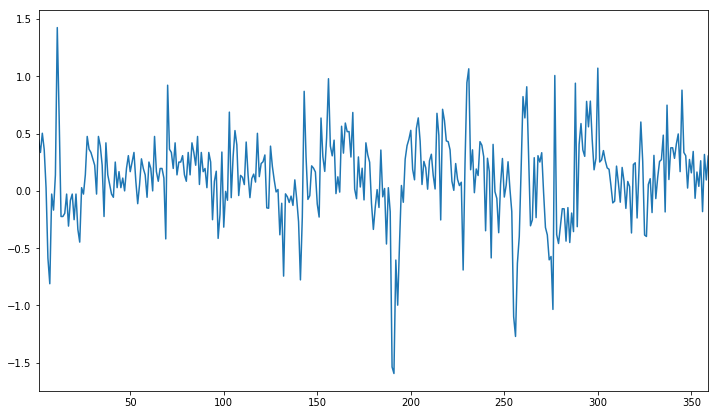

In [93]:
%matplotlib inline
plt.figure(figsize = (12, 7))
df1.plot() #интегрированный ряд первого порядка

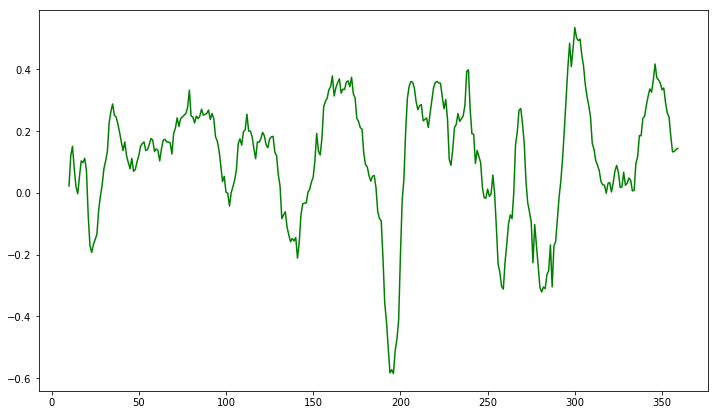

In [91]:
plt.figure(figsize = (12, 7))
rolling_mean1 = df1.rolling(window=10).mean()
plt.plot(rolling_mean1, "g", label="Rolling mean trend")

,Value
count,360.000000
mean,43.347284
std,11.445942
min,22.833100
25%,35.843875
50%,44.769500
75%,52.962875
max,64.421000


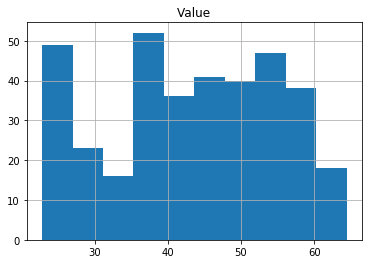

In [10]:
itog = df.describe()
df.hist()
itog